**EN2550: Assignment 03**                                                                                                                                                                                         
Name : Munasinghe M.M.R.H.                                                                                                                                                                                         
Index : 190399L                                                                                                                                                                                         
Github Link: https://github.com/RaviduHM99/EN2550-Fundamentals-of-Image-Processing-and-Machine-Vision.git

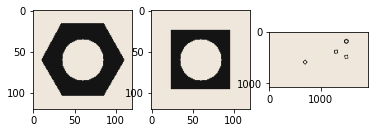

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

hexnut_template = cv.imread('hexnut_template.png', cv.IMREAD_COLOR)
squarenut_template =  cv.imread('squarenut_template.png', cv.IMREAD_COLOR)
conveyor_f100 =  cv.imread('conveyor_f100.png', cv.IMREAD_COLOR)

fig, ax = plt. subplots(1,3)
ax[0].imshow(cv.cvtColor(hexnut_template, cv.COLOR_RGB2BGR))
ax[1].imshow(cv.cvtColor(squarenut_template, cv.COLOR_RGB2BGR))
ax[2].imshow(cv.cvtColor(conveyor_f100, cv.COLOR_RGB2BGR))
plt.show()

hexnut_template threshold value : 116.0
squarenut_template threshold value : 116.0
conveyor_f100 threshold value : 128.0


Text(0.5, 1.0, 'conveyor_f100')

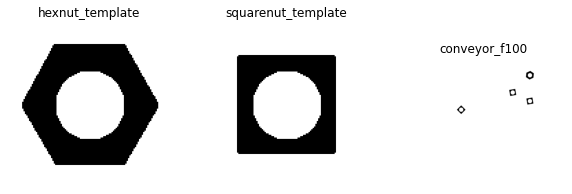

In [2]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

img = cv.imread('hexnut_template.png')
img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
img1 = cv.imread('squarenut_template.png')
img1 = cv.cvtColor(img1, cv.COLOR_BGR2GRAY)
img2 = cv.imread('conveyor_f100.png')
img2 = cv.cvtColor(img2, cv.COLOR_BGR2GRAY)

# Otsu's thresholding after Gaussian filtering
blur1 = cv.GaussianBlur(img,(5,5),0) 
ret1,th1 = cv.threshold(blur1,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
blur2 = cv.GaussianBlur(img1,(5,5),0)
ret2,th2 = cv.threshold(blur2,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
blur3 = cv.GaussianBlur(img2,(5,5),0)
ret3,th3 = cv.threshold(blur3,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)

print('hexnut_template threshold value :', ret1)
print('squarenut_template threshold value :', ret2)
print('conveyor_f100 threshold value :', ret3)

# plot all the images
fig, ax = plt.subplots(1,3, figsize=(10,10))
ax[0].imshow(th1, cmap='gray')
ax[0].axis('off')
ax[0].set_title('hexnut_template')
ax[1].imshow(th2, cmap='gray')
ax[1].axis('off')
ax[1].set_title('squarenut_template')
ax[2].imshow(th3, cmap='gray')
ax[2].axis('off')
ax[2].set_title('conveyor_f100')

Text(0.5, 1.0, 'conveyor_f100')

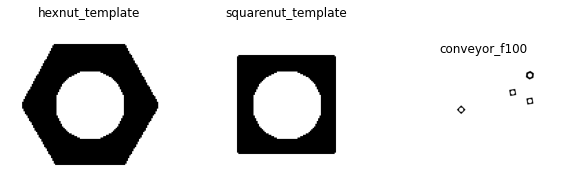

In [3]:
kernel = np.ones((3,3),np.uint8)
closing1 = cv.morphologyEx(th1, cv.MORPH_CLOSE, kernel)
closing2 = cv.morphologyEx(th2, cv.MORPH_CLOSE, kernel)
closing3 = cv.morphologyEx(th3, cv.MORPH_CLOSE, kernel)

# plot all the images
fig, ax = plt.subplots(1,3, figsize=(10,10))
ax[0].imshow(closing1, cmap='gray')
ax[0].axis('off')
ax[0].set_title('hexnut_template')
ax[1].imshow(closing2, cmap='gray')
ax[1].axis('off')
ax[1].set_title('squarenut_template')
ax[2].imshow(closing3, cmap='gray')
ax[2].axis('off')
ax[2].set_title('conveyor_f100')

Number of components in hexnut_template : 3
Statistics in hexnut_template : [[  11   16   99   88 4726]
 [   0    0  120  120 7717]
 [  36   36   49   49 1957]]
Centriods in hexnut_template : [[59.83368599 59.22323318]
 [59.168848   59.54269794]
 [60.         60.        ]]
Number of components in squarenut_template : 3
Statistics in squarenut_template : [[  24   24   72   72 3223]
 [   0    0  120  120 9220]
 [  36   36   49   49 1957]]
Centriods in squarenut_template : [[59.19640087 59.19640087]
 [59.5        59.5       ]
 [60.         60.        ]]
Number of components in conveyor_f100 : 6
Statistics in conveyor_f100 : [[    651     151     895     499   13922]
 [      0       0    1920    1080 2051850]
 [   1476     176      49      49    1957]
 [   1276     376      49      49    1957]
 [   1476     476      49      49    1957]
 [    676     576      49      49    1957]]
Centriods in conveyor_f100 : [[1274.77776182  400.05430254]
 [ 956.25252528  540.88298072]
 [1500.          200.

Text(0.5, 1.0, 'conveyor_f100')

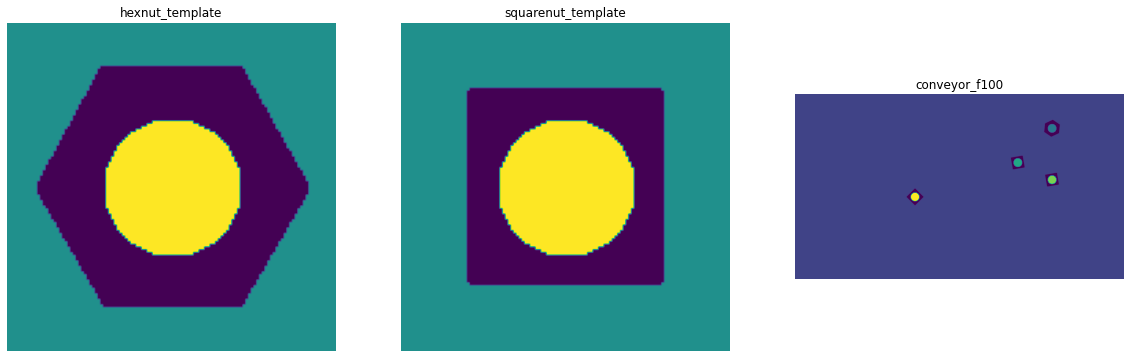

In [121]:
nb_components1, output1, stats1, centroids1 = cv.connectedComponentsWithStats(closing1)
nb_components2, output2, stats2, centroids2 = cv.connectedComponentsWithStats(closing2)
nb_components3, output3, stats3, centroids3 = cv.connectedComponentsWithStats(closing3)

print("Number of components in hexnut_template :", nb_components1)
print("Statistics in hexnut_template :", stats1)
print("Centriods in hexnut_template :", centroids1)

print("Number of components in squarenut_template :", nb_components2)
print("Statistics in squarenut_template :", stats2)
print("Centriods in squarenut_template :", centroids2)

print("Number of components in conveyor_f100 :", nb_components3)
print("Statistics in conveyor_f100 :", stats3)
print("Centriods in conveyor_f100 :", centroids3)

fig, ax = plt.subplots(1,3, figsize=(20,10))
ax[0].imshow(output1)
ax[0].axis('off')
ax[0].set_title('hexnut_template')
ax[1].imshow(output2)
ax[1].axis('off')
ax[1].set_title('squarenut_template')
ax[2].imshow(output3)
ax[2].axis('off')
ax[2].set_title('conveyor_f100')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(-0.5, 1919.5, 1079.5, -0.5)

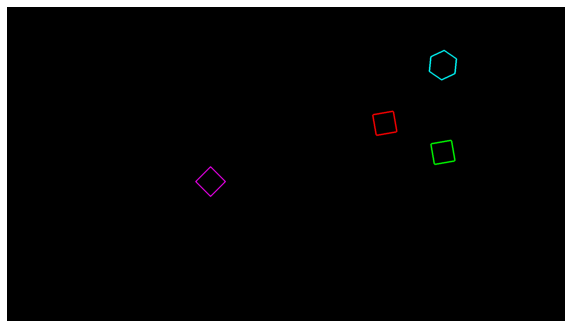

In [115]:
black_img=np.zeros(conveyor_f100.shape)
contours_con_f100, hierarchy_con_f100 = cv.findContours(th3, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
cnt = [contours_con_f100[i] for i in range(1,9,2)]
cnt_colors = [(255,0,255), (0,255,0), (255,0,0), (0,255,255)]
for i in range(4):
    cv.drawContours(black_img, cnt, i, cnt_colors[i], 3)
fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(black_img)
ax.axis('off')

In [122]:
cv.namedWindow('Conveyor', cv.WINDOW_NORMAL)
cap = cv.VideoCapture('conveyor.mp4')
f = 0
Frames_Captured = []
frame = []      
while cap.isOpened():                                    
    ret, frame = cap.read()
    Frames_Captured.append(frame)
    if not ret:
        print("Can't receive frame (stream end?). Exiting.")
        break

    f += 1
    text = 'Frame:' + str(f)
    cv.putText(frame,text , (100, 100), cv.FONT_HERSHEY_COMPLEX, 1, (0,250,0), 1, cv.LINE_AA)
    cv.imshow('Conveyor', frame)

    if cv.waitKey(1) == ord('q'):  
        break

cap.release()
cv.destroyAllWindows()

Can't receive frame (stream end?). Exiting.


In [120]:
tot_matches=0
img = cv.imread('hexnut_template.png')
img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
blur1 = cv.GaussianBlur(img,(5,5),0)
ret1,th1 = cv.threshold(blur1,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
contours_hex,hierarchy_hex = cv.findContours(th1,cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
for i in range(len(contours_con_f100)):
    match = cv.matchShapes(contours_hex[1],contours_con_f100[i],1,0.0)
    if match < 0.001:
        tot_matches += 1
print('Number of hexagonal nuts matches = ',tot_matches)

Number of hexagonal nuts matches =  1


In [123]:
total_nuts=0

for frame in Frames_Captured[:-1]:
    frame_nuts=0

    frame_gray = cv.cvtColor(frame,cv.COLOR_BGR2GRAY)
    frame_blur = cv.GaussianBlur(frame_gray,(5,5),0) 
    ret_f,thresh = cv.threshold(frame_blur,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
    contours_frame,hierarchy_frame = cv.findContours(thresh,cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

    img = cv.imread('hexnut_template.png')
    img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    blur1 = cv.GaussianBlur(img,(5,5),0)
    ret1,th1 = cv.threshold(blur1,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
    contours_hex,hierarchy_hex = cv.findContours(th1,cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

    for cn in contours_frame:
        match = cv.matchShapes(contours_hex[1],cn,1,0.0)
        if (abs(cv.contourArea(cn) - cv.contourArea(contours_hex[1]))<100) and (match < 0.01):
            frame_nuts += 1
            total_nuts = max(total_nuts, frame_nuts)
    
    Current_Text= 'Number of Hex Nuts in current frame : %d'%frame_nuts
    Upto_Text='Total Number of Hex Nuts upto current frame %d'%total_nuts
    cv.putText(frame,Current_Text,(100,150),cv.FONT_HERSHEY_COMPLEX,1,(0,250,0),1,cv.LINE_AA)
    cv.putText(frame,Upto_Text,(100,180),cv.FONT_HERSHEY_COMPLEX,1,(0,250,0),1,cv.LINE_AA)

In [124]:
# Writing the video

frame_array = Frames_Captured[:-1]
shape = (1080, 1920, 3)

out = cv.VideoWriter('./conveyor_result_190399L.mp4',cv.VideoWriter_fourcc(*'h264'), 30, (shape[1], shape[0]))
 
for i in range(len(frame_array)):
    cv.imshow('Frame', frame_array[i])
    if cv.waitKey(1) == ord('q'):
        break
    out.write(frame_array[i])

out.release()
cv.destroyAllWindows()